In [5]:
import os
os.chdir('..')

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

queries_df = pd.read_csv("data/SkyRocket_Queries_Enriched.csv")
responses_df = pd.read_csv("data/SkyRocket_GenAI_Responses_Enriched.csv")


In [7]:
responses_df["is_contained"] = ~responses_df["response_quality_risk"]

containment_rate = responses_df["is_contained"].mean()
print(f"Containment Rate (Proxy): {containment_rate:.2%}")


Containment Rate (Proxy): 51.70%


In [8]:
responses_df["resolution_time_bucket"] = pd.cut(
    responses_df["response_length"],
    bins=[0, 200, 500, 1000, 10000],
    labels=["<1 min", "1–3 min", "3–5 min", ">5 min"]
)


In [9]:
responses_df["resolution_time_bucket"] = pd.cut(
    responses_df["response_length"],
    bins=[0, 200, 500, 1000, 10000],
    labels=["<1 min", "1–3 min", "3–5 min", ">5 min"]
)


In [11]:
topic_trends = (
    responses_df["Sub Category"]
    .value_counts()
    .reset_index()
)

topic_trends.columns = ["Topic", "Query Volume"]
topic_trends.head()


,Topic,Query Volume
0,change_shipping_address,37
1,delete_account,28
2,review,27
3,create_account,25
4,edit_account,24


In [12]:
sentiment_trends = (
    responses_df
    .groupby("Sub Category")["empathy_signal"]
    .mean()
    .reset_index()
    .sort_values("empathy_signal", ascending=False)
)

sentiment_trends.rename(
    columns={"empathy_signal": "Positive Sentiment Rate"},
    inplace=True
)


In [13]:
hallucination_rate = responses_df["contains_placeholder"].mean()
print(f"Hallucination Rate: {hallucination_rate:.2%}")


Hallucination Rate: 47.02%


In [17]:
import pandas as pd

responses_df = pd.read_csv('data/SkyRocket_GenAI_Responses_Enriched.csv')

In [21]:
responses_df["is_contained"] = ~responses_df["response_quality_risk"]
containment_rate = responses_df["is_contained"].mean()
responses_df["is_escalated"] = responses_df["response_quality_risk"]
escalation_rate = responses_df["is_escalated"].mean()
print("Containment Rate:", containment_rate)
print("Escalation Rate:", escalation_rate)

Containment Rate: 0.5170212765957447
Escalation Rate: 0.4829787234042553


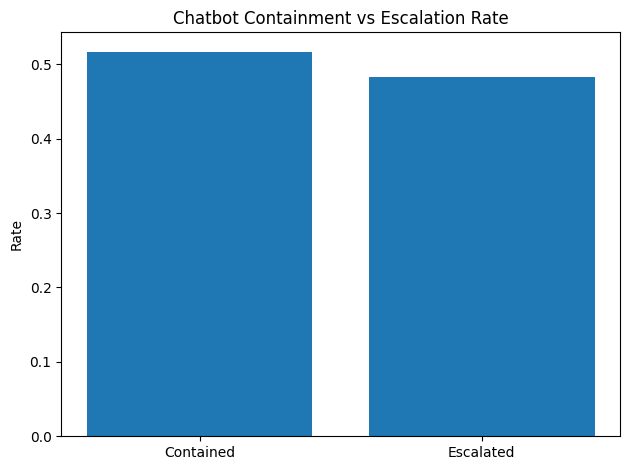

In [22]:
plt.figure()
plt.bar(["Contained", "Escalated"], [containment_rate, escalation_rate])
plt.title("Chatbot Containment vs Escalation Rate")
plt.ylabel("Rate")
plt.tight_layout()
plt.show()


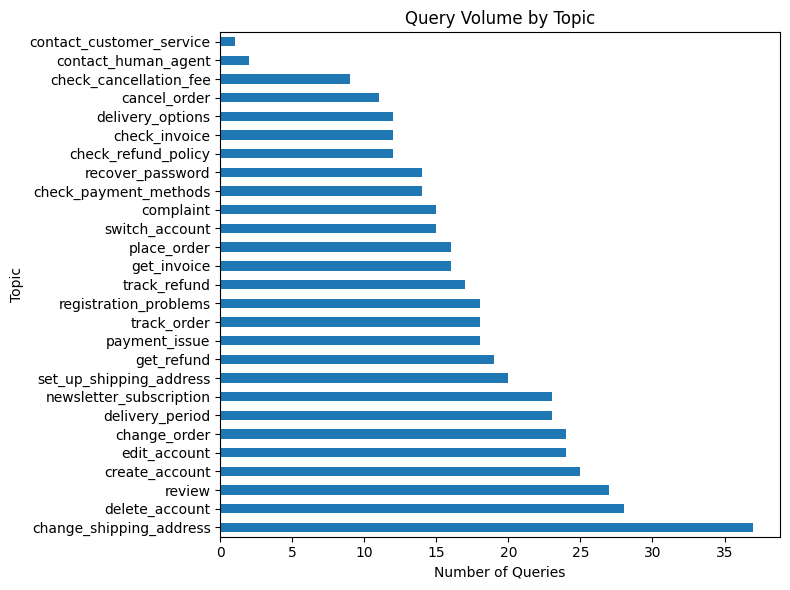

In [23]:
plt.figure(figsize=(8,6))
topic_trends.set_index("Topic")["Query Volume"].plot(kind="barh")
plt.title("Query Volume by Topic")
plt.xlabel("Number of Queries")
plt.ylabel("Topic")
plt.tight_layout()
plt.show()

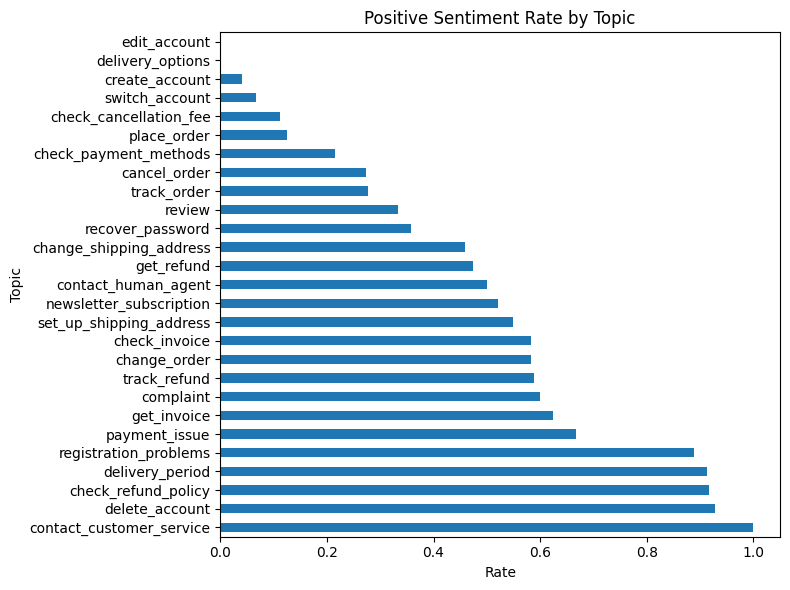

In [24]:
plt.figure(figsize=(8,6))
sentiment_trends.set_index("Sub Category")["Positive Sentiment Rate"].plot(kind="barh")
plt.title("Positive Sentiment Rate by Topic")
plt.xlabel("Rate")
plt.ylabel("Topic")
plt.tight_layout()
plt.show()

In [28]:
responses_df["response_length"] = responses_df["response"].astype(str).str.len()
responses_df["resolution_time_bucket"] = pd.cut(
    responses_df["response_length"],
    bins=[0, 200, 500, 1000, 10000],
    labels=["<1 min", "1–3 min", "3–5 min", ">5 min"]
)
responses_df[["response_length", "resolution_time_bucket"]].head()

,response_length,resolution_time_bucket
0,212,1–3 min
1,279,1–3 min
2,1353,>5 min
3,1112,>5 min
4,1230,>5 min


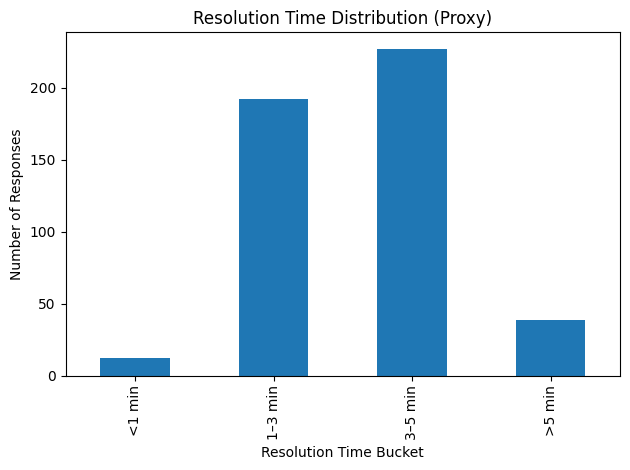

In [29]:
import matplotlib.pyplot as plt

plt.figure()
responses_df["resolution_time_bucket"].value_counts().sort_index().plot(kind="bar")
plt.title("Resolution Time Distribution (Proxy)")
plt.xlabel("Resolution Time Bucket")
plt.ylabel("Number of Responses")
plt.tight_layout()
plt.show()


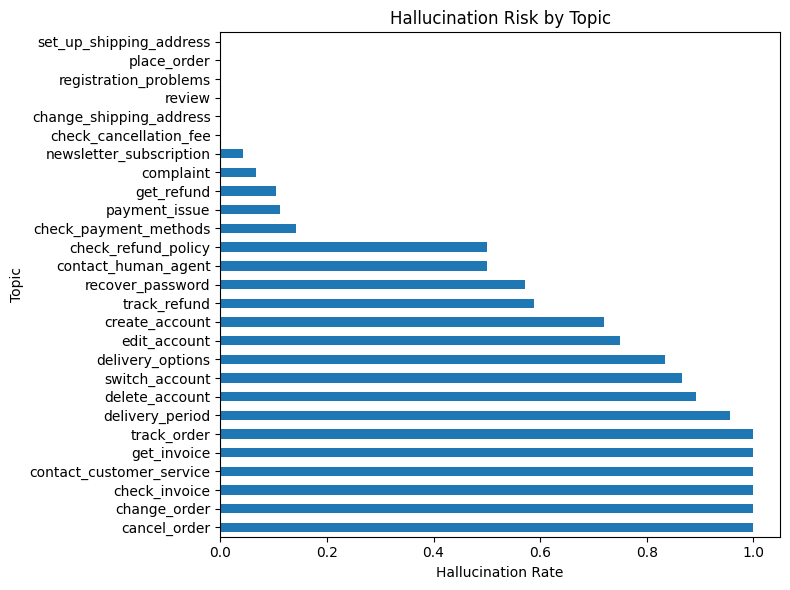

In [26]:
hallucination_by_topic = (
    responses_df
    .groupby("Sub Category")["contains_placeholder"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,6))
hallucination_by_topic.plot(kind="barh")
plt.title("Hallucination Risk by Topic")
plt.xlabel("Hallucination Rate")
plt.ylabel("Topic")
plt.tight_layout()
plt.show()
